## Goals
 - Short introduction Jupyter Notebook
 - End-to-end Machine Learning case
 - Data Science steps
 - 2 minutes Pandas introduction
 - Scikit-learn introduction 
 - Natural Language Processing
 

## Introduction Jupyter Notebook
- Pros - Cons
- When is it suitable?

In [1]:
a = 2
b = 3
a+b

5

Run bash commands from notebook

In [2]:
#!pip install -r requirements.txt

Import necessary modules

In [3]:
import pandas as pd
import time
import datetime as dt
import numpy as np
import requests
import urllib3
import json 
import random 
from tqdm import tqdm
import pickle 
import string
import codecs
from nltk.stem.porter import PorterStemmer
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
from collections import defaultdict

sns.set()

%matplotlib inline

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

LOAD = True
SAVE = False
TRAIN = True

## Data science step 1: Data collection

Get all courses at NTNU

In [4]:
if LOAD:
    res_json = pickle.load(open("course_desc.dict", "rb"))
else:
    res = requests.get("http://www.ime.ntnu.no/api/course/-")
    res_json = json.loads(res.text)
    pickle.dump(res_json, open("course_desc.dict", "wb"))

In [5]:
len(res_json["course"])

5586

In [6]:
res_json["course"][0]

{'code': 'MA3402',
 'name': 'Analyse på mangfoldigheter',
 'norwegianName': 'Analyse på mangfoldigheter',
 'newNorwegianName': 'Analyse på mangfoldigheter',
 'englishName': 'Analysis on Manifolds',
 'versionCode': '1'}

In [7]:
random.choice(res_json["course"])

{'code': 'LGU54009',
 'name': 'Kunst og håndverk 2 (5-10)',
 'norwegianName': 'Kunst og håndverk 2 (5-10)',
 'newNorwegianName': 'Kunst og handverk 2 (5-10)',
 'englishName': 'Art and Crafts 2 (5-10)',
 'versionCode': 'A'}

In [8]:
def get_grades(emne):
    try:
        res = requests.get("https://grades.no/api/courses/{}/grades.json".format(emne))
        grades = json.loads(res.text)
    except Exception as e:
        print(e)
        grades = {}
    return grades

In [9]:
get_grades("TDT4173")

[{'semester_code': 'V2018',
  'average_grade': 3.025,
  'passed': 0,
  'a': 10,
  'b': 46,
  'c': 30,
  'd': 17,
  'e': 5,
  'f': 12},
 {'semester_code': 'S2017',
  'average_grade': 3.11111111111111,
  'passed': 0,
  'a': 1,
  'b': 3,
  'c': 2,
  'd': 2,
  'e': 1,
  'f': 0},
 {'semester_code': 'V2017',
  'average_grade': 2.9047619047619,
  'passed': 0,
  'a': 11,
  'b': 23,
  'c': 24,
  'd': 9,
  'e': 7,
  'f': 10},
 {'semester_code': 'S2016',
  'average_grade': 2.66666666666667,
  'passed': 0,
  'a': 1,
  'b': 0,
  'c': 1,
  'd': 0,
  'e': 0,
  'f': 1},
 {'semester_code': 'V2016',
  'average_grade': 2.7625,
  'passed': 0,
  'a': 9,
  'b': 26,
  'c': 14,
  'd': 9,
  'e': 12,
  'f': 10},
 {'semester_code': 'S2015',
  'average_grade': 1.4,
  'passed': 0,
  'a': 0,
  'b': 1,
  'c': 0,
  'd': 1,
  'e': 1,
  'f': 2},
 {'semester_code': 'H2014',
  'average_grade': 2.76666666666667,
  'passed': 0,
  'a': 12,
  'b': 14,
  'c': 9,
  'd': 7,
  'e': 9,
  'f': 9},
 {'semester_code': 'H2013',
  'av

In [10]:
if LOAD:
    grades = pickle.load(open("grades.dict", "rb"))
else:
    grades = {}
    for course in tqdm(res_json["course"]):
        grades[course["code"]] = get_grades(course["code"])
    pickle.dump(grades, open("grades.dict", "wb"))

## 2 minute introduction to Pandas
 - What is pandas?
 - Most common things you can do with it

In [11]:
df = pd.DataFrame(res_json["course"])

In [12]:
df.head()

,code,englishName,name,newNorwegianName,norwegianName,versionCode
0,MA3402,Analysis on Manifolds,Analyse på mangfoldigheter,Analyse på mangfoldigheter,Analyse på mangfoldigheter,1
1,MUSP4145,Chamber Music B,Kammermusikk B,Kammermusikk B,Kammermusikk B,1
2,MUSP4136,Accompaniment A,Akkompagnering A,Akkompagnering A,Akkompagnering A,1
3,MUSP4137,Secondary Instrument 1,Biinstrument 1,Biinstrument 1,Biinstrument 1,1
4,BA8304,Soil Modelling,Jordmodellering,Jordmodellering,Jordmodellering,1


In [13]:
def get_desc(emne):
    try:
        res = requests.get("http://www.ime.ntnu.no/api/course/en/{}".format(emne)) 
        desc = json.loads(res.text)
    except Exception as e:
        print(e)
        desc = {}
    return desc

In [14]:
get_desc("TDT4171")

{'course': {'code': 'TDT4171',
  'name': 'Artificial Intelligence Methods',
  'norwegianName': 'Metoder i kunstig intelligens',
  'newNorwegianName': 'Metodar i kunstig intelligens',
  'englishName': 'Artificial Intelligence Methods',
  'versionCode': '1',
  'credit': 7.5,
  'creditTypeCode': 'SP',
  'creditTypeName': 'Credits',
  'studyLevelCode': '300',
  'studyLevel': 'LN',
  'studyLevelName': 'Third-year courses, level III',
  'studyProgrammeCode': 'MTDT',
  'gradeRule': '30',
  'gradeRuleText': 'Letters',
  'taughtInSpring': True,
  'taughtInAutumn': False,
  'taughtFromTerm': 'Spring',
  'taughtFromYear': 2008,
  'taughtInEnglish': False,
  'ouId': 827,
  'registrationAfterAdmission': 'DIREKTE',
  'admissionRequirement': False,
  'lastYearTaught': 0,
  'lastAssessmentYear': 0,
  'location': 'Trondheim',
  'infoType': [{'code': 'ANBFORK',
    'name': 'Recommended prev. knowledge',
    'text': 'TDT4136 Introduction to Artificial Intelligence, or equivalent.'},
   {'code': 'FORK', '

In [15]:
if LOAD: 
    info = pickle.load(open("info_english.dict", "rb"))
else:
    info = {}
    for course in tqdm(res_json["course"]):
        info[course["code"]] = get_desc(course["code"])
    pickle.dump(info, open("info_english.dict", "wb"))

In [16]:
info["TDT4171"]

{'course': {'code': 'TDT4171',
  'name': 'Artificial Intelligence Methods',
  'norwegianName': 'Metoder i kunstig intelligens',
  'newNorwegianName': 'Metodar i kunstig intelligens',
  'englishName': 'Artificial Intelligence Methods',
  'versionCode': '1',
  'credit': 7.5,
  'creditTypeCode': 'SP',
  'creditTypeName': 'Credits',
  'studyLevelCode': '300',
  'studyLevel': 'LN',
  'studyLevelName': 'Third-year courses, level III',
  'studyProgrammeCode': 'MTDT',
  'gradeRule': '30',
  'gradeRuleText': 'Letters',
  'taughtInSpring': True,
  'taughtInAutumn': False,
  'taughtFromTerm': 'Spring',
  'taughtFromYear': 2008,
  'taughtInEnglish': False,
  'ouId': 827,
  'registrationAfterAdmission': 'DIREKTE',
  'admissionRequirement': False,
  'lastYearTaught': 0,
  'lastAssessmentYear': 0,
  'location': 'Trondheim',
  'infoType': [{'code': 'ANBFORK',
    'name': 'Recommended prev. knowledge',
    'text': 'TDT4136 Introduction to Artificial Intelligence, or equivalent.'},
   {'code': 'FORK', '

In [17]:
doc = {}
for course in tqdm(res_json["course"]):
    if "infoType" in info[course["code"]]["course"].keys():
        #print(info[course["code"]]["course"]["infoType"])
        text = []
        for x in info[course["code"]]["course"]["infoType"]:
            if x["code"] in ["INNHOLD", "KURSMAT", "MÅL"]:
                try:
                    text.append(x["text"])
                except KeyError:
                    pass
                doc[course["code"]] = "".join(text)

100%|██████████| 5586/5586 [00:00<00:00, 108085.56it/s]


In [18]:
res = requests.get("http://www.ime.ntnu.no/api/org/-") 
org = json.loads(res.text)
org

{'orgUnit': [{'orgUnitId': 1,
   'category': 'Organisasjon',
   'acronym': 'NTNU',
   'name': 'Norges teknisk-naturvitenskapelige universitet',
   'description': 'Norges teknisk- naturvitenskapelige universitet',
   'email': 'postmottak@ntnu.no',
   'url': 'https://www.ntnu.no',
   'validFrom': '1996-01-01',
   'subUnit': [{'orgUnitId': 760,
     'category': ' ',
     'acronym': 'RE',
     'name': 'Rektor',
     'parentId': 1,
     'email': 'postmottak@ntnu.no',
     'url': 'https://www.ntnu.no/rektor',
     'validFrom': '2007-01-01',
     'subUnit': [{'orgUnitId': 1042,
       'category': 'Stab',
       'acronym': 'FO',
       'name': 'Prorektor for forskning',
       'parentId': 760,
       'email': 'postmottak@ntnu.no',
       'url': 'https://www.ntnu.no/prorektor-forskning',
       'validFrom': '2009-08-01',
       'subUnit': [{'orgUnitId': 1044,
         'category': 'Stab',
         'acronym': 'FO-STAB',
         'name': 'Prorektor forskning',
         'parentId': 1042,
         '

In [19]:
def get_subunits(unit, level):
    global orgid_to_fac
    level+=1
    if "subUnit" in unit.keys():
        for subunit in unit["subUnit"]:
            print("\t"*level+subunit["acronym"])
            print("\t"*level+subunit["name"])
            print("\t"*level+str(subunit["orgUnitId"]))
            orgid_to_fac[subunit["orgUnitId"]] = unit["acronym"]
            orgid_to_inst[subunit["orgUnitId"]] = subunit["acronym"]
        return get_subunits(subunit, level)
    else:
        return False

In [20]:
level = 0
orgid_to_fac = defaultdict(str)
orgid_to_inst = defaultdict(str)
for unit in org["orgUnit"][0]["subUnit"][0]["subUnit"]:
    print(unit["acronym"])
    print(unit["name"])
    get_subunits(unit, level)

FO
Prorektor for forskning
	FO-STAB
	Prorektor forskning
	1044
NY
Prorektor for nyskaping
	NY-STAB
	Prorektor nyskaping
	1045
UTD
Prorektor for utdanning
	UTD-STAB
	Prorektor utdanning
	765
	UTD-ST
	Avdeling for studenttjenester
	1201
	UTD-SA
	Avdeling for studieadministrasjon
	1200
	UTD-UK
	Avdeling for utdanningskvalitet
	767
	UTD-UB
	NTNU Universitetsbiblioteket
	774
		UTD-UB-ADM
		Bibliotekadministrasjonen
		1050
		UTD-UB-SANT
		Bibliotekseksjon for arkitektur, naturvitenskap, teknologi og økonomi
		1051
		UTD-UB-HUMSAM
		Bibliotekseksjon for humaniora, samfunns- og utdanningsvitenskap
		1023
		UTD-UB-SKV
		Bibliotekseksjon for kultur- og vitenskapshistorie
		1024
		UTD-UB-MH
		Bibliotekseksjon for medisin og helsevitenskap
		1048
		UTD-UB-SD
		Bibliotekseksjon for samlinger og digitale tjenester
		1046
		UTD-UB-GJO
		Bibliotekseksjon i Gjøvik
		1096
		UTD-UB-ALS
		Bibliotekseksjon i Ålesund
		1115
RE-REK
Rektor og styre
HF
Det humanistiske fakultet
	HF-ADM
	HF fakultetsadministras

In [21]:
def get_fac_from_ouid(ouid):
    try:
        r = requests.get("http://www.ime.ntnu.no/api/org/{}".format(ouid)) 
        o = json.loads(r.text)
        fac = o["orgUnitDetailed"]["acronym"]
    except Exception as e:
        print(e)
        fac = None
    return fac

In [22]:
orgid_to_fac

defaultdict(str,
            {1044: 'FO',
             1045: 'NY',
             765: 'UTD',
             1201: 'UTD',
             1200: 'UTD',
             767: 'UTD',
             774: 'UTD',
             1050: 'UTD-UB',
             1051: 'UTD-UB',
             1023: 'UTD-UB',
             1024: 'UTD-UB',
             1048: 'UTD-UB',
             1046: 'UTD-UB',
             1096: 'UTD-UB',
             1115: 'UTD-UB',
             815: 'HF',
             1082: 'HF',
             1081: 'HF',
             821: 'HF',
             823: 'HF',
             1080: 'HF',
             822: 'HF',
             808: 'AD',
             1213: 'AD',
             1214: 'AD',
             840: 'AD',
             813: 'AD',
             826: 'IE',
             1163: 'IE',
             827: 'IE',
             832: 'IE',
             829: 'IE',
             1215: 'IE',
             831: 'IE',
             828: 'IE',
             830: 'IE',
             835: 'IV',
             1076: 'IV',
             1

In [23]:
orgid_to_inst

defaultdict(str,
            {1044: 'FO-STAB',
             1045: 'NY-STAB',
             765: 'UTD-STAB',
             1201: 'UTD-ST',
             1200: 'UTD-SA',
             767: 'UTD-UK',
             774: 'UTD-UB',
             1050: 'UTD-UB-ADM',
             1051: 'UTD-UB-SANT',
             1023: 'UTD-UB-HUMSAM',
             1024: 'UTD-UB-SKV',
             1048: 'UTD-UB-MH',
             1046: 'UTD-UB-SD',
             1096: 'UTD-UB-GJO',
             1115: 'UTD-UB-ALS',
             815: 'HF-ADM',
             1082: 'HF-IFR',
             1081: 'HF-IHS',
             821: 'HF-IKM',
             823: 'HF-IMU',
             1080: 'HF-ISL',
             822: 'HF-KULT',
             808: 'AD-ADM',
             1213: 'AD-IAP',
             1214: 'AD-IAT',
             840: 'AD-ID',
             813: 'AD-KIT',
             826: 'IE-ADM',
             1163: 'IE-IAL',
             827: 'IE-IDI',
             832: 'IE-IES',
             829: 'IE-IEL',
             1215: 'IE-IIR',
  

Create pandas DataFrame from the dictionary

In [24]:
doc_df = pd.DataFrame.from_dict(doc, orient="index", columns=["description"])

In [25]:
doc_df.head()

,description
MA3402,The course deals with fundamental concepts fro...
MUSP4145,This subject includes chambermusic- repertoire...
MUSP4136,The course includes accompaniment and ensemble...
MUSP4137,Individual lectures and independent work on th...
BA8304,"The course is given every second year, next ti..."


In [26]:
doc_df.sample(5)

,description
DANS3007,The aim of this module is to assist students i...
MUSV2003,This course will explore popular music history...
TS300312,Leadership and occupational psychology:\r\n- m...
SØK3522,Knowledge\r\nYou learn\r\n- how wages are dete...
IMT1002,- Project management\r\n- Academic writing and...


## Data science step 2: Data cleaning/preprocessing/wrangling

Add column with description-length for each course

In [27]:
doc_df["length"] = doc_df.description.apply(lambda x: len(x))

In [28]:
doc_df.sample(5)

,description,length
TDAT1006,,0
TKT4930,Academic content must be agreed with assigned ...,550
AAR5270,The course will deal with the implications of ...,1717
MA8404,The course is given every second year if a suf...,1904
SMF3086,Learning outcome: \r\n- Understand the interre...,325


In [29]:
doc_df["emne"] = doc_df.index.values

In [30]:
doc_df["ouid"] = doc_df.emne.apply(lambda emne: info[emne]["course"]["ouId"])

In [31]:
doc_df["fac"] = doc_df.ouid.map(lambda orgid: orgid_to_fac[orgid])

In [32]:
doc_df["inst"] = doc_df.ouid.map(lambda orgid: orgid_to_inst[orgid])

In [33]:
rest = doc_df[doc_df.fac.apply(lambda x: len(x)==0)].ouid.map(get_fac_from_ouid)
rest

MD4072       MH
NRS8004      MH
NRS8002      MH
AAR4805      AD
AAR4600      AD
MD4030       MH
MD4061       MH
SPRÅK8895    HF
ESTET8881    HF
AAR4918      AD
ARK8871      HF
SPRÅK8861    HF
SPRÅK8865    HF
SPRÅK8877    HF
RVI8871      HF
MD4051       MH
IFEL8000     IV
ESTET8863    HF
HMS0002      IE
NRS8003      MH
ØK8000       OK
SPRÅK8868    HF
ESTET8880    HF
AAR4906      AD
SPRÅK8863    HF
SPRÅK8882    HF
MD3004       MH
MD4053       MH
HIKU8862     HF
MD4031       MH
             ..
ESTET8871    HF
AAR4800      AD
MD3002       MH
MD3012       MH
MD3016       MH
SPRÅK8881    HF
MD4020       MH
SPRÅK8885    HF
TLOG3010     IV
SFEL8000     SU
SPRÅK8896    HF
AAR4801      AD
HMS0003      NV
HIKU8861     HF
SPRÅK8873    HF
AAR4505      AD
SPRÅK8874    HF
SPRÅK8875    HF
AAR4601      AD
MD4062       MH
MD4042       MH
KOMP1003     IE
FI8871       HF
MD3003       MH
NRSN8001     MH
SPRÅK8876    HF
MD4011       MH
AAR4901      AD
SPRÅK8869    HF
KOMP1001     IE
Name: ouid, Length: 84, 

Set the values that are missing

In [34]:
doc_df.loc[rest.index, "fac"] = rest.values

Anyone without label now?

In [35]:
doc_df[doc_df.fac.apply(lambda x: len(x)==0)]

,description,length,emne,ouid,fac,inst


Save the DataFrame

In [36]:
if SAVE:
    doc_df.to_pickle("doc_df.pkl")

In [37]:
doc_df.sample(5)

,description,length,emne,ouid,fac,inst
BI8010,The objective of the course is to train young ...,1335,BI8010,865,NV,NV-IBI
TBA4925,Students will complete a master thesis within ...,430,TBA4925,1217,IV,IV-IBM
MB104314,Life in ocean\n\nBiological terms\n\nMarine mi...,777,MB104314,1134,NV,NV-IBA
FY8918,Medical imaging modalities based on nuclear me...,1019,FY8918,867,NV,NV-IFY
TMT4210,The course includes a general introduction to ...,2637,TMT4210,870,NV,NV-IMA


## Data science step 3: Eploratory Data Analysis (EDA) 

Distribution of description length

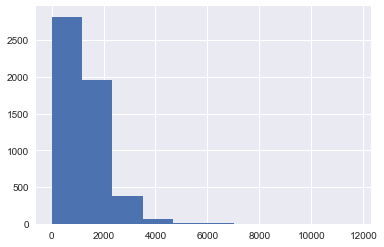

In [38]:
doc_df.length.hist()

Distribution of courses by faculty

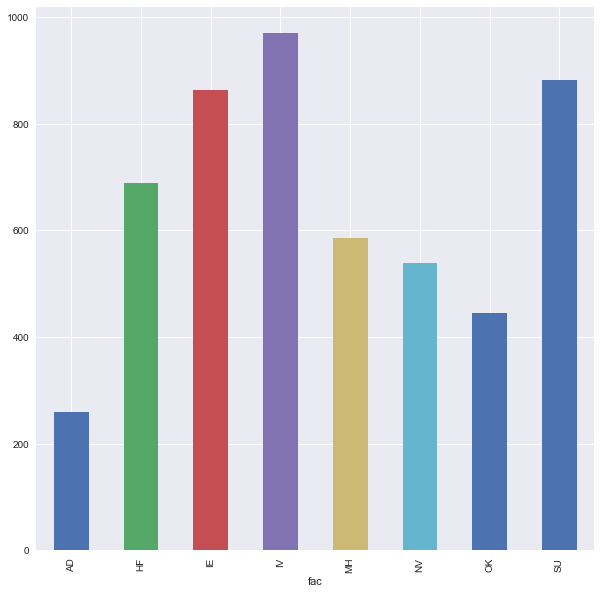

In [39]:
doc_df.groupby("fac")["fac"].agg("count").plot(kind="bar", figsize=(10,10))

Create a DataFrame from the grade-dictionary

In [40]:
max([len(v) for k, v in grades.items()])

38

In [41]:
rows = []
for k,v in grades.items():
    for rec in v:
        if (type(rec)==dict):
            rows.append(([k]+list(rec.values())))
        else:
            pass
            #print(type(rec))
            #print(rec)

In [42]:
rec

{'semester_code': 'V2018',
 'average_grade': 3.9411764705882355,
 'passed': 0,
 'a': 4,
 'b': 8,
 'c': 5,
 'd': 0,
 'e': 0,
 'f': 0}

In [43]:
doc_df.shape

(5233, 6)

In [44]:
doc_df = doc_df[doc_df.length>0]

In [45]:
doc_df.shape

(4058, 6)

In [46]:
grade_df = pd.DataFrame(rows, columns=["emne"]+list(rec.keys()))
grade_df.head(20)

,emne,semester_code,average_grade,passed,a,b,c,d,e,f
0,MA3402,H2007,4.500000,0,2,2,0,0,0,0
1,MA3402,H2008,4.400000,0,3,1,1,0,0,0
2,MA3402,H2009,4.250000,0,4,3,0,1,0,0
3,MA3402,H2010,4.250000,0,4,2,2,0,0,0
4,MA3402,H2011,4.714286,0,6,0,1,0,0,0
5,MA3402,H2012,4.750000,0,3,1,0,0,0,0
6,MA3402,H2013,4.000000,0,2,1,2,0,0,0
7,MA3402,H2014,4.250000,0,6,1,0,0,0,1
8,MA3402,H2015,3.916667,0,6,3,0,2,1,0
9,MA3402,H2016,3.900000,0,6,2,0,0,1,1


In [47]:
if SAVE:
    grade_df.to_pickle("grade_df.pkl")

In [48]:
merged = grade_df.merge(doc_df.loc[:,["emne", "fac", "inst"]], how="left", on="emne")

In [49]:
merged.head()

,emne,semester_code,average_grade,passed,a,b,c,d,e,f,fac,inst
0,MA3402,H2007,4.500000,0,2,2,0,0,0,0,IE,IE-IMF
1,MA3402,H2008,4.400000,0,3,1,1,0,0,0,IE,IE-IMF
2,MA3402,H2009,4.250000,0,4,3,0,1,0,0,IE,IE-IMF
3,MA3402,H2010,4.250000,0,4,2,2,0,0,0,IE,IE-IMF
4,MA3402,H2011,4.714286,0,6,0,1,0,0,0,IE,IE-IMF


In [50]:
merged["year"] = merged.semester_code.apply(lambda x: int(x[1:]))
merged.sample(5)

,emne,semester_code,average_grade,passed,a,b,c,d,e,f,fac,inst,year
20307,PK8203,H2010,4.000000,0,1,5,1,0,0,0,IV,IV-MTP,2010
12367,ALIT1103,V2018,3.294118,0,6,12,8,3,4,1,HF,HF-ISL,2018
11776,SOS2900,H2011,3.533333,0,4,11,12,3,0,0,SU,SU-ISS,2011
6432,TFY4200,V2007,2.850000,0,3,3,8,3,0,3,NV,NV-IFY,2007
21090,SØK1001,H2014,2.956989,0,48,40,33,16,19,30,OK,OK-ISO,2014


Average grade distribution by faculty

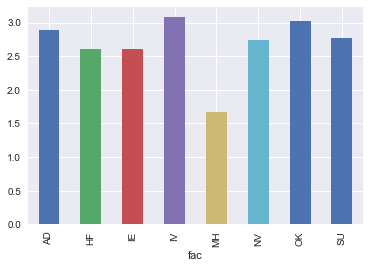

In [51]:
merged.groupby("fac")["average_grade"].agg("mean").plot(kind="bar")

Average grade development at IE

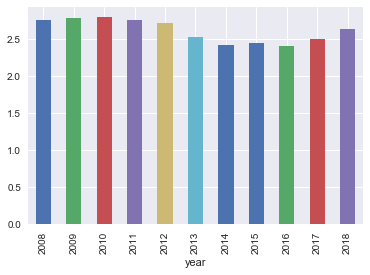

In [52]:
merged.loc[(merged.year>=2008) & (merged.fac=="IE")].groupby("year")["average_grade"].agg("mean").plot(kind="bar")

Average grade development at IDI

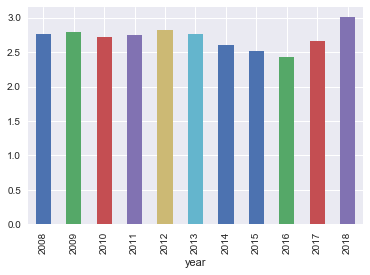

In [53]:
merged.loc[(merged.year>=2008) & (merged.inst=="IE-IDI")].groupby("year")["average_grade"].agg("mean").plot(kind="bar")

Increase in percentage since 2016

In [54]:
vals = merged.loc[(merged.year>=2008) & (merged.inst=="IE-IDI")].groupby("year")["average_grade"].agg("mean")[[2016, 2018]].values
vals

array([2.42301678, 3.00379264])

In [55]:
vals[1]/vals[0]

1.2396912255978179

In [56]:
if SAVE:
    merged.to_pickle("merged.pkl")

## Special case: Natural Language Processing (NLP)

In [57]:
doc_df.description["IT3708"]

'The main focus of the course is to build intelligent systems based on two key natural concepts: evolution by natural selection and swarm intelligence.  Such intelligent systems have thousands of useful applications in fields as diverse as control theory, telecommunications, music and art.  This course discusses both methods in great detail along with providing a bit of the biological basis for each.Lecture slides, a textbook (possibly 2).  Textbooks are chosen  at the beginning of the semester.Students will get both theoretical and practical programming experience with two of the best known sub-symbolic AI methods: evolutionary algorithms and swarm intelligence algorithms. '

In [58]:
remove_punctuation = lambda d: "".join([ (c if c not in string.punctuation+"\n\r\t" else " ") for c in d])

In [59]:
remove_punctuation(doc_df.description["IT3708"])

'The main focus of the course is to build intelligent systems based on two key natural concepts  evolution by natural selection and swarm intelligence   Such intelligent systems have thousands of useful applications in fields as diverse as control theory  telecommunications  music and art   This course discusses both methods in great detail along with providing a bit of the biological basis for each Lecture slides  a textbook  possibly 2    Textbooks are chosen  at the beginning of the semester Students will get both theoretical and practical programming experience with two of the best known sub symbolic AI methods  evolutionary algorithms and swarm intelligence algorithms  '

In [60]:
stemmer = PorterStemmer()

In [61]:
?PorterStemmer

In [62]:
tokenize = lambda d: [stemmer.stem(w.lower()) for w in remove_punctuation(d).split(" ") if len(w)>0]

In [63]:
tokenize(doc_df.description["IT3708"])

['the',
 'main',
 'focu',
 'of',
 'the',
 'cours',
 'is',
 'to',
 'build',
 'intellig',
 'system',
 'base',
 'on',
 'two',
 'key',
 'natur',
 'concept',
 'evolut',
 'by',
 'natur',
 'select',
 'and',
 'swarm',
 'intellig',
 'such',
 'intellig',
 'system',
 'have',
 'thousand',
 'of',
 'use',
 'applic',
 'in',
 'field',
 'as',
 'divers',
 'as',
 'control',
 'theori',
 'telecommun',
 'music',
 'and',
 'art',
 'thi',
 'cours',
 'discuss',
 'both',
 'method',
 'in',
 'great',
 'detail',
 'along',
 'with',
 'provid',
 'a',
 'bit',
 'of',
 'the',
 'biolog',
 'basi',
 'for',
 'each',
 'lectur',
 'slide',
 'a',
 'textbook',
 'possibl',
 '2',
 'textbook',
 'are',
 'chosen',
 'at',
 'the',
 'begin',
 'of',
 'the',
 'semest',
 'student',
 'will',
 'get',
 'both',
 'theoret',
 'and',
 'practic',
 'program',
 'experi',
 'with',
 'two',
 'of',
 'the',
 'best',
 'known',
 'sub',
 'symbol',
 'ai',
 'method',
 'evolutionari',
 'algorithm',
 'and',
 'swarm',
 'intellig',
 'algorithm']

In [64]:
doc_df.description.sample().values

array(['Introduction to language paradigms, semantics and computational models. \r\nLanguage models supporting declarative, functional, logic, lazy, dataflowbased, object-oriented, distributed, constraint-based and parallell programming.\r\nProgramming language syntax, interpretation and semantics. Not decided yet.The course should give (1) an understanding of basic properties of imperative, logical, functional and object oriented programming languages (2) practical knowledge of techniqes for implementing such languages and for describing their meaning (3) the ability to understand and compare existing and future languages.'],
      dtype=object)

## Data science step 3: Feature Engineering

In [65]:
?TfidfVectorizer

In [66]:
if LOAD:
    stoplist = pickle.load(open("webapp/stoplist.pkl","rb"))
else:
    res = requests.get("https://www.textfixer.com/tutorials/common-english-words.txt")
    stoplist = res.text.split(",")
stoplist

['a',
 'able',
 'about',
 'across',
 'after',
 'all',
 'almost',
 'also',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'but',
 'by',
 'can',
 'cannot',
 'could',
 'dear',
 'did',
 'do',
 'does',
 'either',
 'else',
 'ever',
 'every',
 'for',
 'from',
 'get',
 'got',
 'had',
 'has',
 'have',
 'he',
 'her',
 'hers',
 'him',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'just',
 'least',
 'let',
 'like',
 'likely',
 'may',
 'me',
 'might',
 'most',
 'must',
 'my',
 'neither',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'often',
 'on',
 'only',
 'or',
 'other',
 'our',
 'own',
 'rather',
 'said',
 'say',
 'says',
 'she',
 'should',
 'since',
 'so',
 'some',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'this',
 'tis',
 'to',
 'too',
 'twas',
 'us',
 'wants',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'would

In [67]:
if SAVE:
    pickle.dump(stoplist, open("webapp/stoplist.pkl","wb"))

In [68]:
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words=stoplist)

## Data science step 4: Modelling

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

- Train/(validation)/test split 
- Stratify

In [70]:
X_train, X_test, y_train, y_test = train_test_split(doc_df.description, doc_df.fac, stratify=doc_df.fac)

In [71]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3043,), (3043,), (1015,), (1015,))

In [72]:
pd.get_dummies(y_train).head()

,AD,HF,IE,IV,MH,NV,OK,SU
FY8308,0,0,0,0,0,1,0,0
KUH3202,0,1,0,0,0,0,0,0
IMT2312,1,0,0,0,0,0,0,0
LAT1004,0,1,0,0,0,0,0,0
TMR4254,0,0,0,1,0,0,0,0


In [73]:
X_train = pd.concat([X_train, pd.get_dummies(y_train)], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(y_test)], axis=1)

In [167]:
TRAIN = False
SAVE = False

If we want to train on full dataset

In [168]:
if not TRAIN:
    if LOAD:
        all_doc = pickle.load( open("webapp/all_doc.pkl", "rb"))
        X_all = pd.read_pickle("webapp/X_all.df")
    else:
        X_all = pd.concat([doc_df.description, pd.get_dummies(doc_df.fac)], axis=1)
        all_doc = vec.fit_transform(X_all.description.values)
        if SAVE:
            X_all.to_pickle("webapp/X_all.df")
            pickle.dump(all_doc, open("webapp/all_doc.pkl", "wb"))
    print(all_doc.shape)

(4058, 40251)


In [75]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3043, 9), (3043,), (1015, 9), (1015,))

In [76]:
trn_doc = vec.fit_transform(X_train.description.values)
test_doc = vec.transform(X_test.description.values)

In [77]:
trn_doc.shape

(3043, 30288)

In [78]:
trn_doc[0]

<1x30288 sparse matrix of type '<class 'numpy.float64'>'
	with 62 stored elements in Compressed Sparse Row format>

In [79]:
vec.vocabulary_

{'quantum': 21477,
 'field': 10288,
 'theori': 27039,
 'univers': 28575,
 'press': 20177,
 'm': 15585,
 'kachelriess': 14097,
 'lectur': 15027,
 'note': 17837,
 'student': 25365,
 'expect': 9875,
 'obtain': 18016,
 'insight': 13305,
 'import': 12630,
 'aspect': 2444,
 'particular': 18868,
 'knowledg': 14253,
 'renorm': 22306,
 'group': 11692,
 'critic': 6440,
 'phenomena': 19304,
 'thermal': 27212,
 'symmetri': 26119,
 'break': 3531,
 'effect': 8675,
 'applic': 1997,
 'normal': 17757,
 'given': 11456,
 'everi': 9695,
 'year': 30158,
 'cours': 6055,
 'continu': 5787,
 'mani': 15918,
 'particl': 18863,
 'system': 26136,
 'spontan': 24859,
 'breakdown': 3532,
 'theorem': 26982,
 'mechan': 16337,
 'field theori': 10395,
 'univers press': 28581,
 'kachelriess lectur': 14098,
 'lectur note': 15048,
 'student expect': 25454,
 'expect obtain': 9895,
 'obtain insight': 18028,
 'insight import': 13336,
 'import aspect': 12635,
 'particular student': 18887,
 'obtain knowledg': 18029,
 'renorm gro

In [80]:
trn_doc[0].todense(), trn_doc[0].todense().shape

(matrix([[0., 0., 0., ..., 0., 0., 0.]]), (1, 30288))

In [81]:
np.where(trn_doc[0].todense())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([ 1997,  2444,  3531,  3532,  5787,  6055,  6119,  6440,  6477,
         8675,  9695,  9698,  9875,  9895, 10288, 10395, 11456, 11471,
        11692, 12630, 12635, 13305, 13336, 14097, 14098, 14253, 15027,
        15048, 15585, 15918, 15922, 16337, 16356, 17757, 17837, 18016,
        18028, 18029, 18863, 18866, 18868, 18887, 19304, 20177, 21477,
        21480, 22306, 22307, 24859, 25365, 25454, 26119, 26136, 26982,
        27039, 27049, 27128, 27212, 28575, 28581, 30158, 30162],
       dtype=int64))

In [82]:
inv_voc = {v:k for k,v in vec.vocabulary_.items()}

In [83]:
X_train.description.iloc[0]

'A. Zee, Quantum Field Theory in a Nutshell, Princeton University Press;\r\nM. Kachelriess: Lecture notes for FY3464 and FY3466.The student is expected to obtain insight into the most important aspects of quantum field theories.\r\n\r\nIn particular, students are expected to obtain knowledge about the \r\nrenormalization group, critical phenomena, thermal field theory,\r\nsymmetries and symmetry breaking, effective field theories and\r\napplications.\r\nNormally given every other year.\r\n\r\nThe course is a continuation of FY3464 Quantum Field Theory I and TFY4210 Quantum theory of many particle systems. \r\n\r\nRenormalization and the renormalization group. Critical phenomena. Spontaneous symmetry breakdown. The Goldstone theorem. The Higgs mechanism. Effective field theories and applications.'

In [84]:
[inv_voc[x] for x in np.where(trn_doc[0].todense())[1]]

['applic',
 'aspect',
 'break',
 'breakdown',
 'continu',
 'cours',
 'cours continu',
 'critic',
 'critic phenomena',
 'effect',
 'everi',
 'everi year',
 'expect',
 'expect obtain',
 'field',
 'field theori',
 'given',
 'given everi',
 'group',
 'import',
 'import aspect',
 'insight',
 'insight import',
 'kachelriess',
 'kachelriess lectur',
 'knowledg',
 'lectur',
 'lectur note',
 'm',
 'mani',
 'mani particl',
 'mechan',
 'mechan effect',
 'normal',
 'note',
 'obtain',
 'obtain insight',
 'obtain knowledg',
 'particl',
 'particl system',
 'particular',
 'particular student',
 'phenomena',
 'press',
 'quantum',
 'quantum theori',
 'renorm',
 'renorm group',
 'spontan',
 'student',
 'student expect',
 'symmetri',
 'system',
 'theorem',
 'theori',
 'theori applic',
 'theori mani',
 'thermal',
 'univers',
 'univers press',
 'year',
 'year cours']

In [85]:
label_cols = doc_df.fac.unique().tolist()
label_cols

['IE', 'HF', 'IV', 'AD', 'SU', 'MH', 'NV', 'OK']

In [86]:
trn_doc.shape

(3043, 30288)

In [169]:
if not TRAIN:
    trn_doc = all_doc
    X_train = X_all

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

![title](nb.png)

In [170]:
def prior(y_i, y):
    '''
    y_i is either 1 or 0.
    y is numpy array of labels
    '''
    p = trn_doc[y==y_i].sum(0) # Number of documents in trn_doc with given label
    return (p+1) / ((y==y_i).sum()+1) # Fraction of all documents with given label

In [171]:
def get_mdl(y):
    y = y.values #pandas Series to numpy array
    r = np.log(prior(1,y) / prior(0,y)) #Log likelihood ratio for both possibilities
    m = LogisticRegression(C=4, multi_class="ovr") # Logistic regression model
    x_nb = trn_doc.multiply(r) # Multiply the Tf-idf features with this ratio
    return m.fit(x_nb, y), r

Create empty array to store prdictions

In [90]:
preds = np.zeros((len(X_test), len(label_cols)))
preds.shape

(1015, 8)

In [91]:
X_train.head()

,description,AD,HF,IE,IV,MH,NV,OK,SU
FY8308,"A. Zee, Quantum Field Theory in a Nutshell, Pr...",0,0,0,0,0,1,0,0
KUH3202,«Jews and Muslims in Medieval Imagery»: Mediev...,0,1,0,0,0,0,0,0
IMT2312,History of letterforms -- with a special empha...,1,0,0,0,0,0,0,0
LAT1004,This course offers a further study of the diff...,0,1,0,0,0,0,0,0
TMR4254,The aim of this subject is to provide students...,0,0,0,1,0,0,0,0


In [173]:
models = {}
rs = {}
for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(X_train[j])
    if TRAIN:
        preds[:,i] = m.predict_proba(test_doc.multiply(r))[:,1]
    else:
        if SAVE:
            np.save(open("webapp/r_"+j+".npy", "wb"), r)
            pickle.dump(m, open("webapp/"+j+"_model.pkl", "wb"))
    models[j] = m
    rs[j] = r

fit IE
fit HF
fit IV
fit AD
fit SU
fit MH
fit NV
fit OK


In [157]:
if not TRAIN:
    print("Steps below not applicable")
    raise NotImplementedError

In [158]:
df_preds = pd.DataFrame(preds, columns=label_cols)
df_preds.head()

,IE,HF,IV,AD,SU,MH,NV,OK
0,0.674663,0.012854,0.065757,0.004142,0.011338,0.007331,0.026844,0.013902
1,0.067024,0.007569,0.468674,0.010505,0.020659,0.009749,0.054137,0.082593
2,0.022704,0.973063,0.024709,0.004417,0.010137,0.005825,0.007053,0.008104
3,0.011091,0.013550,0.017319,0.003867,0.016315,0.997382,0.007050,0.008635
4,0.027012,0.007500,0.118728,0.010497,0.011824,0.771047,0.011031,0.022636


In [159]:
y_test = X_test.loc[:,label_cols]

In [160]:
for c in df_preds.columns:
    df_preds[c] = (df_preds.max(axis=1)==df_preds[c]).astype(int)

In [161]:
y_test.head()

,IE,HF,IV,AD,SU,MH,NV,OK
TM8102,1,0,0,0,0,0,0,0
BT3120,0,0,0,0,0,0,1,0
NFUT0107,0,1,0,0,0,0,0,0
VPM2012D,0,0,0,0,0,1,0,0
ERG3001,0,0,0,0,0,1,0,0


In [162]:
df_preds.head()

,IE,HF,IV,AD,SU,MH,NV,OK
0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


In [163]:
from sklearn.metrics import confusion_matrix

In [165]:
pd.DataFrame(confusion_matrix(y_test.values.argmax(axis=1), df_preds.values.argmax(axis=1)), index=label_cols, columns=label_cols)

,IE,HF,IV,AD,SU,MH,NV,OK
IE,137,1,14,0,1,1,1,0
HF,2,160,1,0,3,0,0,1
IV,11,0,212,1,0,0,2,3
AD,6,1,12,36,2,0,0,0
SU,2,4,5,0,112,2,0,1
MH,4,0,2,0,3,64,6,0
NV,8,0,9,0,0,1,87,1
OK,7,0,6,0,2,0,0,81


Accuracy:

In [166]:
(y_test.values.argmax(axis=1)==df_preds.values.argmax(axis=1)).sum()/len(y_test)

0.8758620689655172

Accuracy not the most "fair" metric in multi-class classification problems

In [102]:
comp = pd.DataFrame(np.concatenate([y_test.values, df_preds.values], axis=1))
comp.columns = label_cols+[x+"_pred" for x in label_cols]
comp.head()

,IE,HF,IV,AD,SU,MH,NV,OK,IE_pred,HF_pred,IV_pred,AD_pred,SU_pred,MH_pred,NV_pred,OK_pred
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [103]:
comp[comp.IE!=comp.IE_pred]

,IE,HF,IV,AD,SU,MH,NV,OK,IE_pred,HF_pred,IV_pred,AD_pred,SU_pred,MH_pred,NV_pred,OK_pred
34,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
38,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
86,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
98,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
109,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
114,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
188,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
205,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
208,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [104]:
wrong_df = pd.DataFrame(preds[comp.IE!=comp.IE_pred], index=comp[comp.IE!=comp.IE_pred].index, columns=[c+"_prob" for c in label_cols])
wrong_df

,IE_prob,HF_prob,IV_prob,AD_prob,SU_prob,MH_prob,NV_prob,OK_prob
34,0.187805,0.009790,0.105640,0.011415,0.016406,0.850786,0.011519,0.009500
38,0.702484,0.008662,0.734668,0.003876,0.013280,0.007591,0.028305,0.011295
86,0.186072,0.031753,0.058128,0.064364,0.028308,0.039901,0.071672,0.142191
98,0.243512,0.542740,0.043034,0.006586,0.018730,0.012958,0.012814,0.010071
109,0.186072,0.031753,0.058128,0.064364,0.028308,0.039901,0.071672,0.142191
114,0.186072,0.031753,0.058128,0.064364,0.028308,0.039901,0.071672,0.142191
188,0.281424,0.017794,0.162336,0.098392,0.022276,0.009746,0.020076,0.014463
198,0.030575,0.005832,0.098462,0.005266,0.007398,0.006840,0.885611,0.013315
205,0.074856,0.010668,0.248089,0.006989,0.016249,0.010411,0.104975,0.008764
208,0.614196,0.014988,0.956974,0.005535,0.009619,0.010175,0.010491,0.008908


In [105]:
pd.concat([comp[comp.IE!=comp.IE_pred], wrong_df], axis=1)

,IE,HF,IV,AD,SU,MH,NV,OK,IE_pred,HF_pred,...,NV_pred,OK_pred,IE_prob,HF_prob,IV_prob,AD_prob,SU_prob,MH_prob,NV_prob,OK_prob
34,1,0,0,0,0,0,0,0,0,0,...,0,0,0.187805,0.009790,0.105640,0.011415,0.016406,0.850786,0.011519,0.009500
38,1,0,0,0,0,0,0,0,0,0,...,0,0,0.702484,0.008662,0.734668,0.003876,0.013280,0.007591,0.028305,0.011295
86,0,0,0,0,0,1,0,0,1,0,...,0,0,0.186072,0.031753,0.058128,0.064364,0.028308,0.039901,0.071672,0.142191
98,1,0,0,0,0,0,0,0,0,1,...,0,0,0.243512,0.542740,0.043034,0.006586,0.018730,0.012958,0.012814,0.010071
109,0,0,0,1,0,0,0,0,1,0,...,0,0,0.186072,0.031753,0.058128,0.064364,0.028308,0.039901,0.071672,0.142191
114,0,0,1,0,0,0,0,0,1,0,...,0,0,0.186072,0.031753,0.058128,0.064364,0.028308,0.039901,0.071672,0.142191
188,0,0,0,1,0,0,0,0,1,0,...,0,0,0.281424,0.017794,0.162336,0.098392,0.022276,0.009746,0.020076,0.014463
198,1,0,0,0,0,0,0,0,0,0,...,1,0,0.030575,0.005832,0.098462,0.005266,0.007398,0.006840,0.885611,0.013315
205,1,0,0,0,0,0,0,0,0,0,...,0,0,0.074856,0.010668,0.248089,0.006989,0.016249,0.010411,0.104975,0.008764
208,1,0,0,0,0,0,0,0,0,0,...,0,0,0.614196,0.014988,0.956974,0.005535,0.009619,0.010175,0.010491,0.008908


Choose a random sample where prediction was wrong

In [106]:
doc_df.rename(columns={"emne":"course"}).to_csv("course_descriptions.csv")

In [107]:
grade_df.rename(columns={"emne":"course"}).to_csv("grades.csv")

In [108]:
def get_wrong_ie():
    ind = random.choice(wrong_df.index.values)
    print("Randomly selected sample with index {}".format(ind))
    print("Description: \n")
    print(X_test.description.iloc[ind])
    print("\nPredictions:")
    print(wrong_df.loc[ind])
    print("\nTrue:")
    print(X_test.index.values[ind])
    print("\n")
    print(comp.loc[ind,label_cols]) #.iloc[ind])

In [109]:
get_wrong_ie()

Randomly selected sample with index 905
Description: 

The course provides the students with the basic mathematical skills necessary to understand central analytical methods in economic theory. The main part of the course covers mathematical analysis with multivariable functions, with applications for theories of consumption and production. In addition, the course consists of integration, differential equations and linear algebra. Announced at the beginning of the term.Knowledge
You learn
- about definite and indefinite integrals of one variable and several variables, techniques for solving integrals (integration by parts and integration by substitution)
- how geometric series can be used in financial mathematics.
linear algebra, including addition and multiplication of vectors and matrices, geometric interpretation of vectors, solution of linear systems of equations, linear independence, rank of matrices, determinants, eigenvalues and eigenvectors
- about first-and second-order differ

In [110]:
def get_confident():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-110-9047037cb81f>, line 2)

In [111]:
def classify(text):
    preds = {}
    test_doc = vec.transform([text])
    for label, m in models.items():
        init_preds = m.predict_proba(test_doc.multiply(rs[label]))[:,1]
        preds[label] = init_preds[0]
    return preds

In [112]:
classify('Machine learning algorithms are complex computer systems and artificial intelligence is really cool')

{'IE': 0.974620487837659,
 'HF': 0.008142956156010652,
 'IV': 0.04712168042722556,
 'AD': 0.0051620248194186496,
 'SU': 0.009542917817362056,
 'MH': 0.0075520574078317085,
 'NV': 0.010260410517824028,
 'OK': 0.009347626731297997}

In [113]:
classify('Neurologial biological human medicine interaction patients prosthesis')

{'IE': 0.01405035981558193,
 'HF': 0.010630840273564061,
 'IV': 0.01580900850410323,
 'AD': 0.006243909557598152,
 'SU': 0.012983766317194516,
 'MH': 0.9793260564864291,
 'NV': 0.3183767379627378,
 'OK': 0.011903846438206087}